<a href="https://colab.research.google.com/github/edsml-ok121/c-examples/blob/main/15_06_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo import gdal_array
%matplotlib inline


from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [18]:
clouds = pd.read_csv('/content/drive/MyDrive/IRP/remotesensing-13-00736-s001.csv')
from sklearn.model_selection import train_test_split

clouds["Class"].replace({'clouds': 1, 'shadows': 2, 'other':3}, inplace=True)


X = clouds.iloc[:, 2:-3]
y = clouds.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [19]:
clouds.head()

Planet  Sentinel
#B1    - B1
#B2    - B2
#B3 (Green-I band) in Planet is 513-549, and there is no equivalent in Snetinel
#B4    - B3
#B5 (Yellow band) in Planet is 600 -620, so again no equivalent in sentinel
#B6    - B4
#B7    - B5
#B8    - B8

#So instead of 12 bands 6 will be used, if such method of cloud masking is used

,Longitude,Latitude,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,MNDWI,Class
0,-74.974001,8.006758,0.0919,0.0564,0.0738,0.0766,0.0936,0.0724,0.0893,0.0491,0.0798,0.1325,0.0452,0.0357,-0.218775,0.240336,2
1,-74.969917,8.008476,0.0650,0.0647,0.0852,0.0910,0.0887,0.0607,0.0670,0.0496,0.0520,0.0742,0.0307,0.0244,-0.294452,0.470233,2
2,-74.970008,8.008476,0.0656,0.0579,0.0750,0.0796,0.0892,0.0604,0.0673,0.0459,0.0516,0.0718,0.0309,0.0247,-0.268526,0.416431,2
3,-74.929643,7.906166,0.0293,0.0250,0.0275,0.0254,0.0398,0.0611,0.0689,0.0405,0.0765,0.1351,0.0606,0.0339,0.229135,-0.375709,2
4,-74.929643,7.906256,0.0300,0.0251,0.0318,0.0246,0.0536,0.1027,0.1285,0.0735,0.1351,0.1513,0.0877,0.0451,0.498471,-0.467782,2


In [199]:
clf =  SVC(kernel = 'rbf', gamma= 1.0, C=100.0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.995896870598322


In [111]:
ds = gdal.Open('/content/drive/MyDrive/IRP/data/Ghana,_May_13_2022_psscene_analytic_8b_sr_udm2/files/20220513_093642_20_2442_3B_AnalyticMS_SR_8b_harmonized_clip.tif')
ds1 = gdal.Open('/content/drive/MyDrive/IRP/data/Ghana,_May_13_2022_psscene_analytic_8b_sr_udm2/files/20220513_093644_50_2442_3B_AnalyticMS_SR_8b_harmonized_clip.tif')


image = np.zeros((ds.RasterYSize, ds.RasterXSize, ds.RasterCount),
                 )
#dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
# Loop over all bands in dataset
for b in range(ds.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = ds.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()


image1 = np.zeros((ds1.RasterYSize, ds1.RasterXSize, ds1.RasterCount),
                 )
#dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
# Loop over all bands in dataset
for b in range(ds1.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band1 = ds1.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image1[:, :, b] = band1.ReadAsArray()

print(image.shape)
print(image1.shape)

average  = (image+image1)/2
average.shape

print(image[100, 100, 1])
print(image1[100, 100, 1])
print(average[100, 100, 1])

(891, 1057, 8)
(891, 1057, 8)
438.0
418.0
428.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


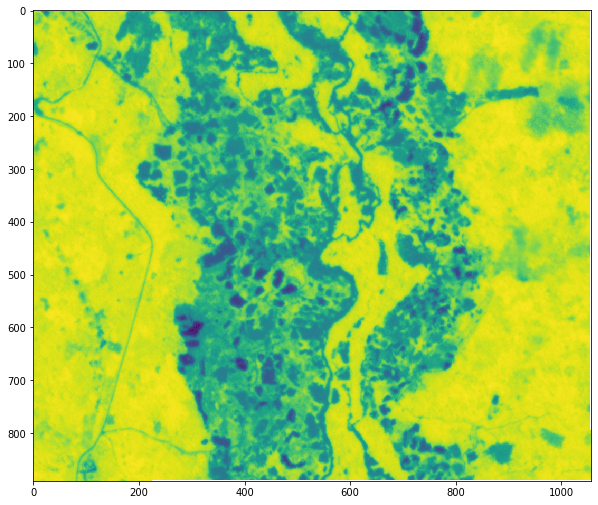

In [93]:
from numpy.lib.shape_base import dsplit
ds = gdal.Open('/content/drive/MyDrive/IRP/data/Ghana,_May_13_2022_psscene_analytic_8b_sr_udm2/files/20220513_093642_20_2442_3B_AnalyticMS_SR_8b_harmonized_clip.tif')
ds1 = gdal.Open('/content/drive/MyDrive/IRP/data/Ghana,_May_13_2022_psscene_analytic_8b_sr_udm2/files/20220513_093644_50_2442_3B_AnalyticMS_SR_8b_harmonized_clip.tif')

image = np.zeros((ds.RasterYSize, ds.RasterXSize, ds.RasterCount),
                 )
#dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
# Loop over all bands in dataset
for b in range(ds.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = ds.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

ndvi = (image[:, :, 7] - image[:, :, 5]) / (image[:, :, 7] + image[:, :, 5])
#plt.imshow(ndvi)
#plt.colorbar()

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(ndvi, interpolation='nearest')


3820.0
2382.0
3053.0


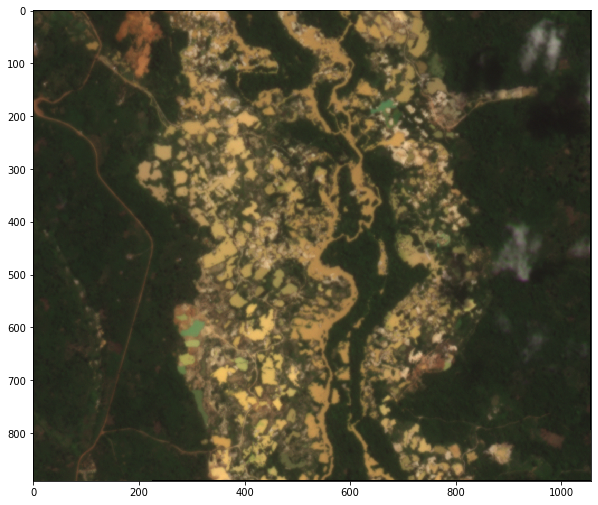

In [94]:
print(np.amax(image[:, :, 5]))
print(np.amax(image[:, :, 1]))
print(np.amax(image[:, :, 3]))

index = np.array([5, 3, 1])
colors = image[:, :, index].astype(np.float64)

max_val = 3820
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)


fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(colors[:, :, :], interpolation='nearest')

## Opening landuse change files

In [91]:
from numpy.lib.shape_base import dsplit
ds = gdal.Open('/content/drive/MyDrive/IRP/data/Bigger_Set_21_19_HistMatch/1/R1_original_2019-08-18.tif')

image = np.zeros((ds.RasterYSize, ds.RasterXSize, ds.RasterCount),
                 )
#dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
# Loop over all bands in dataset
for b in range(ds.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = ds.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

#ndvi = (image[:, :, 7] - image[:, :, 5]) / (image[:, :, 7] + image[:, :, 5])
#plt.imshow(ndvi)
#plt.colorbar()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23.0
36.0
48.0


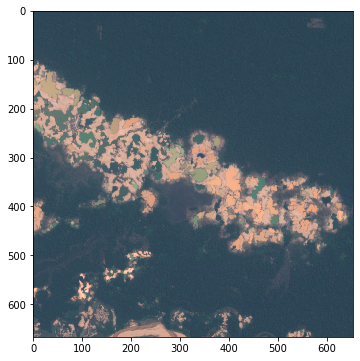

In [53]:
print(np.amin(image[:, :, 0]))
print(np.amin(image[:, :, 1]))
print(np.amin(image[:, :, 2]))

max_val = 175
min_val = 23

index = np.array([0, 1, 2])
colors = image[:, :, index].astype(np.float64)
# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)


fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(colors[:, :, :], interpolation='nearest')

#(green − red)/(green + red)

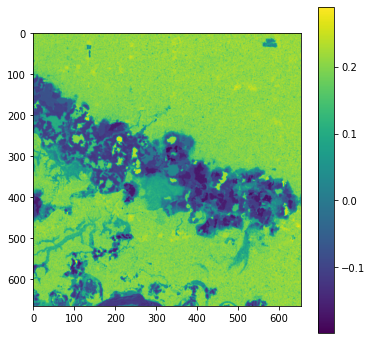

In [54]:
C_indx =  (image[:, :, 1] - image[:, :, 0]) / (image[:, :, 1] + image[:, :, 0])

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(C_indx)
fig.colorbar(im, ax=ax, orientation='vertical')
plt.show()

The color index nd RGB image from paper

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


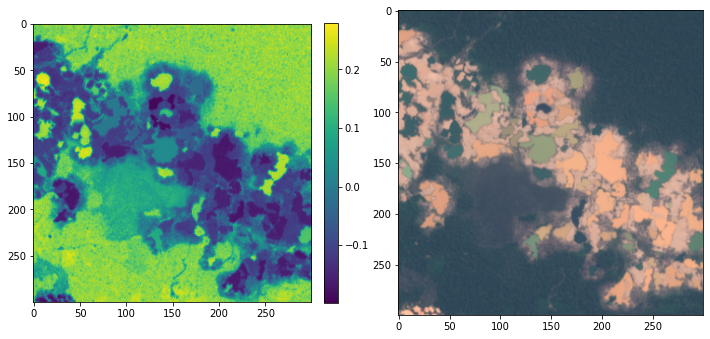

In [68]:
clip = colors[200:500, 200:500, :]
C_indx =  (clip[:, :, 1] - clip[:, :, 0]) / (clip[:, :, 1] + clip[:, :, 0])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
p1 = ax1.imshow(C_indx)
plt.colorbar(p1,ax=ax1, fraction=0.046, pad=0.04)
#fig.colorbar(C_indx, ax=ax1, orientation='vertical')
p2 = ax2.imshow(clip)

#fig.colorbar(clip, ax=ax2, orientation='vertical')


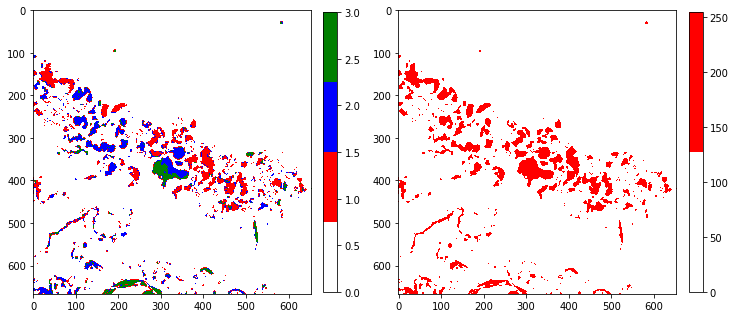

In [78]:


from PIL import Image 
from matplotlib import colors                                                                               
img = Image.open('/content/drive/MyDrive/IRP/data/Bigger_Set_21_19_HistMatch/1/R1_original_four_change_thr.png')
bchange = Image.open('/content/drive/MyDrive/IRP/data/Bigger_Set_21_19_HistMatch/1/R1_original_Binary_change_thr.png')
img = np.array(img)
bchange = np.array(bchange)
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green'])
cmap_b = colors.ListedColormap(['white', 'red',])
#plt.imshow(img, cmap = cmap)
#plt.colorbar()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
p1 = ax1.imshow(img, cmap = cmap)
plt.colorbar(p1,ax=ax1, fraction=0.046, pad=0.04)
#fig.colorbar(C_indx, ax=ax1, orientation='vertical')
p2 = ax2.imshow(bchange, cmap = cmap_b)
plt.colorbar(p2,ax=ax2, fraction=0.046, pad=0.04)


#No change - 0 (white)
#Decrease - 1 (red)
#Increase - 2 (blue)
#Water Existence/absence - 3(green)

In [28]:
#Importing multichanel images


image.shape

import scipy.io
mat = scipy.io.loadmat('/content/drive/MyDrive/IRP/data/Bigger_Set_21_19_HistMatch/1/R1_original_2019-08-18_ch6.mat')

test_set = scipy.io.loadmat('/content/drive/MyDrive/IRP/data/Diff_ponds/1/R1_original_2019-08-18_ch10.mat')

In [82]:
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 26 11:18:37 2021',
 '__version__': '1.0',
 'new': array([[[ 26,  40,  50, 114,  65,  23],
         [ 26,  40,  50, 106,  67,  23],
         [ 27,  41,  51, 128,  67,  23],
         ...,
         [ 27,  41,  51, 121,  71,  25],
         [ 27,  43,  52, 149,  71,  25],
         [ 26,  43,  50, 135,  69,  24]],
 
        [[ 26,  40,  50, 116,  66,  24],
         [ 25,  39,  50, 105,  62,  22],
         [ 26,  40,  51, 119,  62,  22],
         ...,
         [ 27,  42,  51, 127,  73,  26],
         [ 28,  43,  52, 131,  73,  26],
         [ 28,  43,  51, 131,  72,  26]],
 
        [[ 28,  42,  51, 123,  66,  24],
         [ 27,  42,  51, 107,  62,  22],
         [ 27,  40,  51, 100,  62,  22],
         ...,
         [ 29,  45,  52, 141,  73,  26],
         [ 30,  44,  52, 121,  73,  26],
         [ 28,  42,  50, 119,  72,  26]],
 
        ...,
 
        [[103,  87,  85, 126, 120,  90],
         

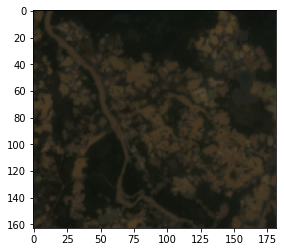

In [59]:

# reading main image
ds = gdal.Open('/content/drive/MyDrive/IRP/Ashanti 10mpx.tif')

img1 = np.zeros((ds.RasterYSize, ds.RasterXSize, ds.RasterCount),
                 )
#dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
# Loop over all bands in dataset
for b in range(ds.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = ds.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    img1[:, :, b] = band.ReadAsArray()
img1.shape[2]

plt.imshow(np.flip(img1[:, :, 1: 4], 2))

Histogram Matching

No of Channel is: 12
No of Channel is: 12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


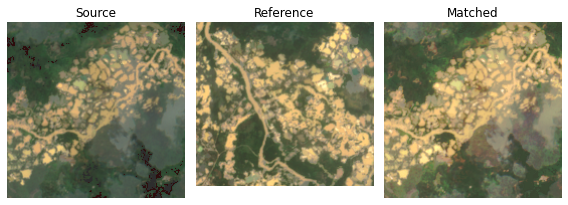

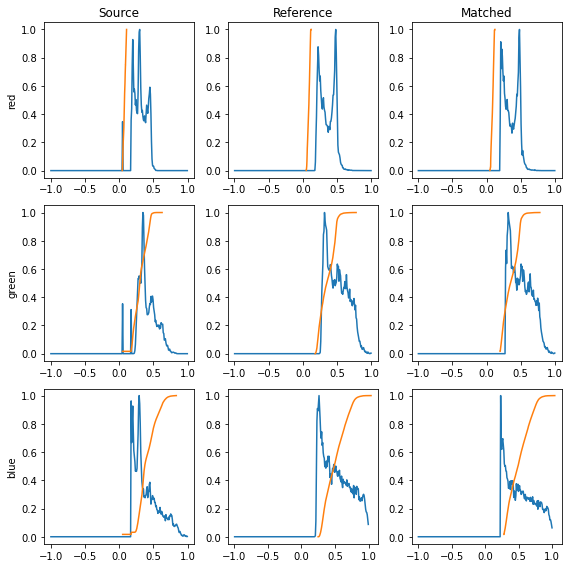

In [71]:
# import packages
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2
from PIL import Image 


# reading main image
ds = gdal.Open('/content/drive/MyDrive/IRP/Ashanti 10mpx.tif')

img1 = np.zeros((ds.RasterYSize, ds.RasterXSize, ds.RasterCount),
                 )
#dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
# Loop over all bands in dataset
for b in range(ds.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = ds.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    img1[:, :, b] = band.ReadAsArray()

# checking the number of channels
print('No of Channel is: ' + str(img1.shape[2]))

max_val = 0.3324
min_val = 0.0503

# Enforce maximum and minimum values

for b in range(1, 4):
  img1[img1[:, :, b] > max_val] = max_val
  img1[img1[:, :, b] < min_val] = min_val
  img1[:, :, b] = img1[:, :, b] * 1 / (max_val - min_val)

# reading reference image
ds2 = gdal.Open('/content/drive/MyDrive/IRP/Menukrom_10mpx.tif')

img2 = np.zeros((ds2.RasterYSize, ds2.RasterXSize, ds2.RasterCount),
                 )
#dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
# Loop over all bands in dataset
for b in range(ds2.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = ds2.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    img2[:, :, b] = band.ReadAsArray()

# checking the number of channels
print('No of Channel is: ' + str(img2.shape[2]))

# Enforce maximum and minimum values

for b in range(1, 4):
  img2[img2[:, :, b] > max_val] = max_val
  img2[img2[:, :, b] < min_val] = min_val
  img2[:, :, b] = img2[:, :, b] * 1 / (max_val - min_val)



image = img2
reference = img1

matched = match_histograms(image, reference ,
						multichannel=True)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
									figsize=(8, 3),
									sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
	aa.set_axis_off()

ax1.imshow(np.flip(image[:, :, 1: 4], 2))
ax1.set_title('Source')
ax2.imshow(np.flip(reference[:, :, 1: 4], 2))
ax2.set_title('Reference')
ax3.imshow(np.flip(matched[:, :, 1: 4], 2))
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((image, reference, matched)):
	for c, c_color in enumerate(('red', 'green', 'blue')):
		img_hist, bins = exposure.histogram(img[..., c+1],
											source_range='dtype')
		axes[c, i].plot(bins, img_hist / img_hist.max())
		img_cdf, bins = exposure.cumulative_distribution(img[..., c])
		axes[c, i].plot(bins, img_cdf)
		axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()



In [ ]:
model example

#https://stackoverflow.com/questions/63358155/concatenate-cnn-to-compare-two-images